#PROJECT PRESENTATION LINK:
https://drive.google.com/file/d/1SaKnmosdkBlX4ykDRDhPmUagnYrZ7lTl/view?usp=share_link

#IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import sklearn 
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

# **DATA** **IMPORTING**

In [ ]:
data = pd.read_excel('/content/heart.xlsx')
data


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Here output of 0 signifies that a person has low chances of heart attack while 1 suggests that the person has higher chances of heart attack


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.shape

(303, 14)

In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.isnull().sum() # We have no missing values in the dataset

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#DATA CLEANING


In [ ]:
#looking for null values
print("Null values : : ")
print(data.isnull() .sum())

Null values : : 
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [ ]:
cat_var = ["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]
num_var = ["age","trtbps","chol","thalachh","oldpeak"]

In [ ]:
data[num_var].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [ ]:
data[cat_var].describe()

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,0.148515,0.528053,0.326733,1.399340,0.729373,2.313531,0.544554
std,0.466011,1.032052,0.356198,0.525860,0.469794,0.616226,1.022606,0.612277,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.shape

(303, 14)

##CHECKING FOR OUTLIERS

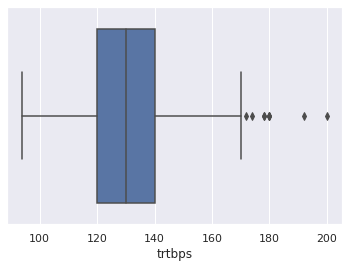

In [ ]:
#detecting outliers
sns.boxplot(x=data['trtbps'])

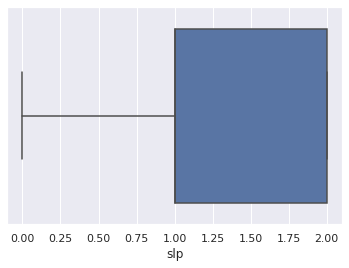

In [ ]:
sns.boxplot(x=data['slp'])

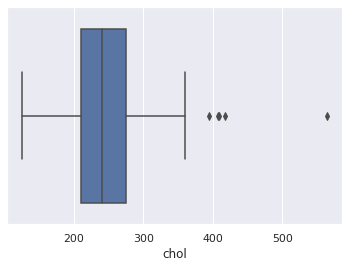

In [ ]:
sns.boxplot(x=data['chol'])

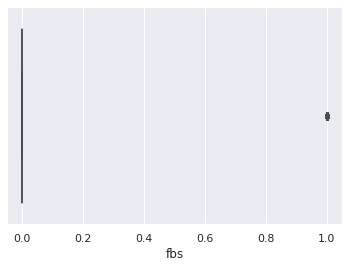

In [ ]:
sns.boxplot(x=data['fbs'])

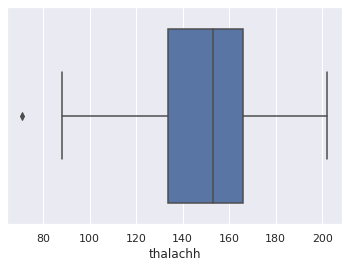

In [ ]:

sns.boxplot(x=data['thalachh'])

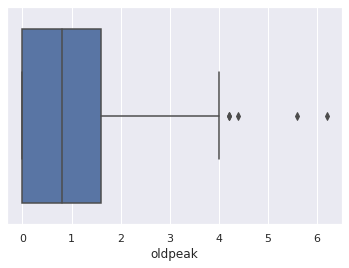

In [ ]:
sns.boxplot(x=data['oldpeak'])

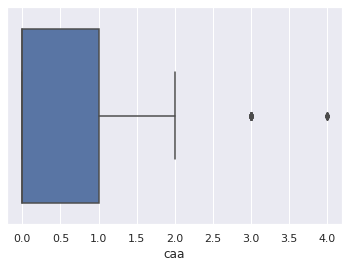

In [ ]:
sns.boxplot(x=data['caa'])

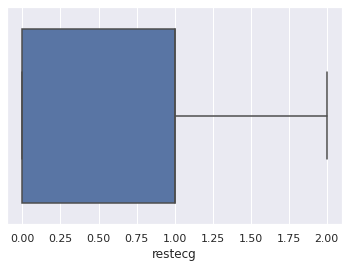

In [ ]:
sns.boxplot(x=data['restecg'])

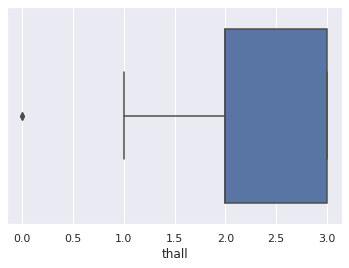

In [ ]:
sns.boxplot(x=data['thall'])

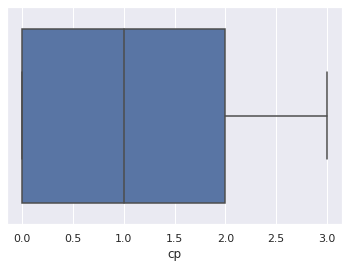

In [ ]:
sns.boxplot(x=data['cp'])

In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

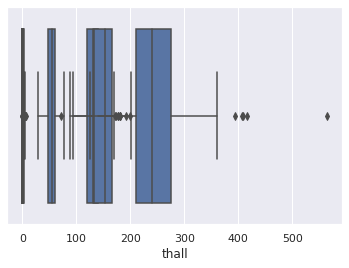

In [ ]:
sns.boxplot(x=data['age'])
#No Outliers observed in 'age'
sns.boxplot(x=data['cp'])
#No outliers in 'cp'
sns.boxplot(x=data['trtbps'])
#Some outliers are observed in 'trtbps'. They will be removed later
sns.boxplot(x=data['chol'])
#Some outliers are observed in 'chol'. They will be removed later
sns.boxplot(x=data['fbs'])
sns.boxplot(x=data['restecg'])
sns.boxplot(x=data['thalachh'])
#Outliers present in thalachh
sns.boxplot(x=data['exng'])
sns.boxplot(x=data['oldpeak'])
#Outliers are present in 'OldPeak'
sns.boxplot(x=data['slp'])
sns.boxplot(x=data['caa'])
#Outliers are present in 'caa'
sns.boxplot(x=data['thall'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

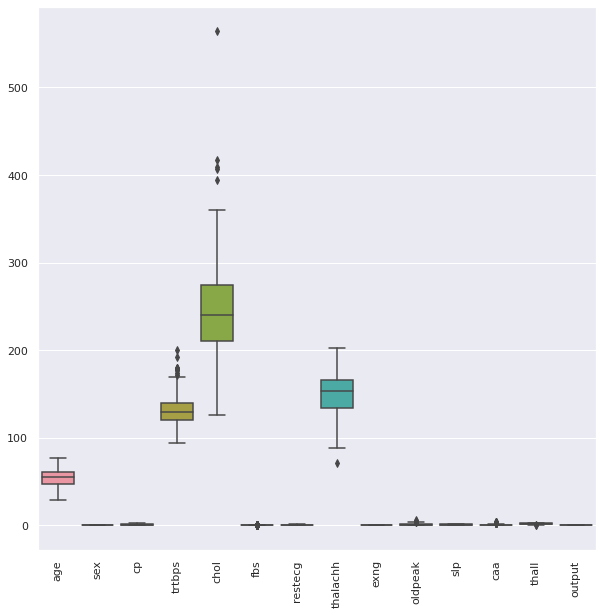

In [ ]:
plt.figure(figsize=(10,10))
p = sns.boxplot(data = data,orient = 'v',width=0.8)
plt.xticks(rotation=90)

##REMOVING OUTLIERS USING INTER QUARTILE METHOD

In [ ]:
from numpy.lib.function_base import quantile
#find interquartile range
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
Q1 , Q3

(age          47.5
 sex           0.0
 cp            0.0
 trtbps      120.0
 chol        211.0
 fbs           0.0
 restecg       0.0
 thalachh    133.5
 exng          0.0
 oldpeak       0.0
 slp           1.0
 caa           0.0
 thall         2.0
 output        0.0
 Name: 0.25, dtype: float64, age          61.0
 sex           1.0
 cp            2.0
 trtbps      140.0
 chol        274.5
 fbs           0.0
 restecg       1.0
 thalachh    166.0
 exng          1.0
 oldpeak       1.6
 slp           2.0
 caa           1.0
 thall         3.0
 output        1.0
 Name: 0.75, dtype: float64)

In [ ]:
Inter_quartile_range = Q3 - Q1
Inter_quartile_range

age         13.5
sex          1.0
cp           2.0
trtbps      20.0
chol        63.5
fbs          0.0
restecg      1.0
thalachh    32.5
exng         1.0
oldpeak      1.6
slp          1.0
caa          1.0
thall        1.0
output       1.0
dtype: float64

In [ ]:
data1 = data[~((data<(Q1-1.5*Inter_quartile_range))|(data>(Q3+1.5*Inter_quartile_range))).any(axis=1)]

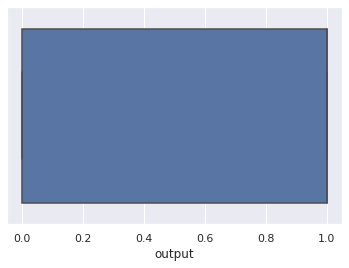

In [ ]:
sns.boxplot(x=data1['output'])

In [ ]:
data1.shape

(228, 14)

#EDA

##COUNT PLOT

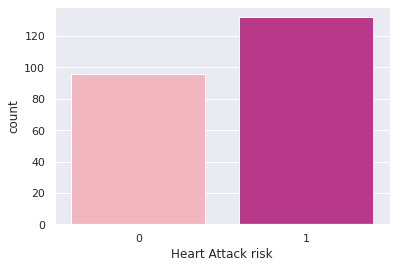

In [ ]:
#EDA
sns.countplot(x = data1['output'], palette= 'RdPu')
plt.xlabel('Heart Attack risk');

##DIST PLOT

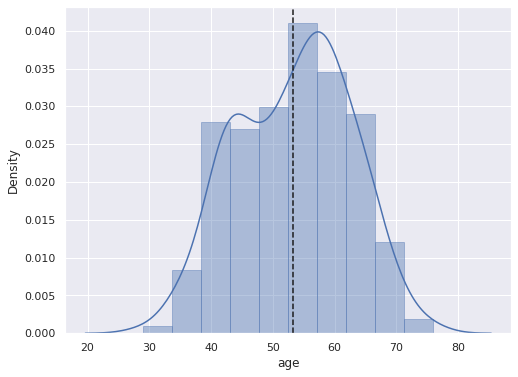

In [ ]:
x ,y=plt.subplots(figsize =(8,6))
sns.distplot(data1["age"], hist_kws =dict(linewidth =1,edgecolor ="b"),ax =y)
y.axvline(data1["age"].mean(),color ="k",ls="--")





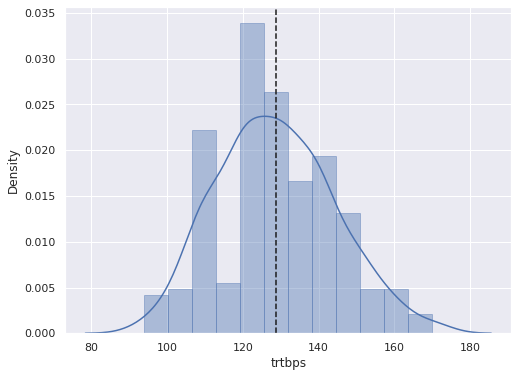

In [ ]:
x ,y=plt.subplots(figsize =(8,6))
sns.distplot(data1["trtbps"], hist_kws =dict(linewidth =1,edgecolor ="b"),ax =y)
y.axvline(data1["trtbps"].mean(),color ="k",ls="--")


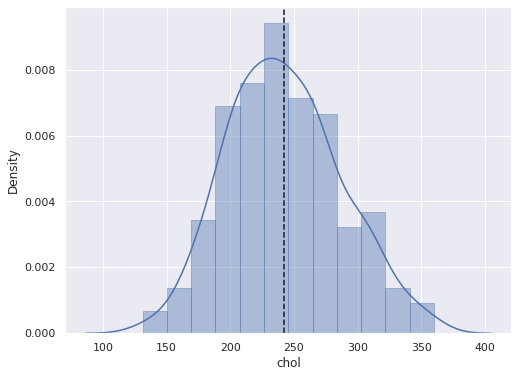

In [ ]:
x ,y=plt.subplots(figsize =(8,6))
sns.distplot(data1["chol"], hist_kws =dict(linewidth =1,edgecolor ="b"),ax =y)
y.axvline(data1["chol"].mean(),color ="k",ls="--")


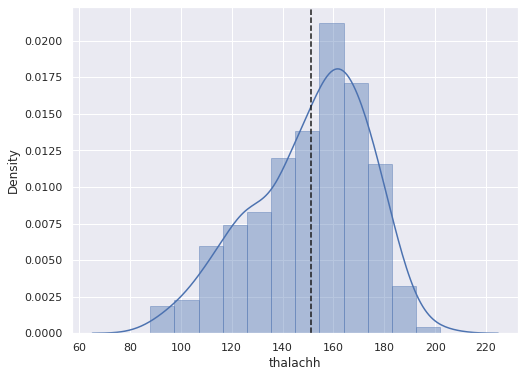

In [ ]:
x ,y=plt.subplots(figsize =(8,6))
sns.distplot(data1["thalachh"], hist_kws =dict(linewidth =1,edgecolor ="b"),ax =y)
y.axvline(data1["thalachh"].mean(),color ="k",ls="--")


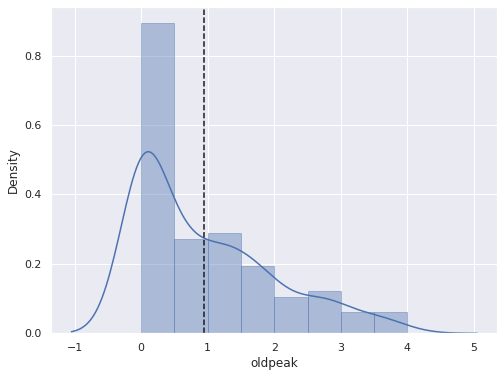

In [ ]:
x ,y=plt.subplots(figsize =(8,6))
sns.distplot(data1["oldpeak"], hist_kws =dict(linewidth =1,edgecolor ="b"),ax =y)
y.axvline(data1["oldpeak"].mean(),color ="k",ls="--")


In [ ]:
cat_var

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

##PIE CHARTS

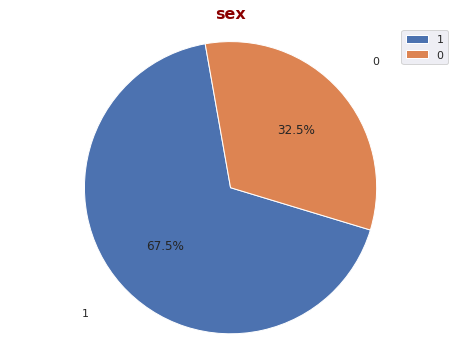

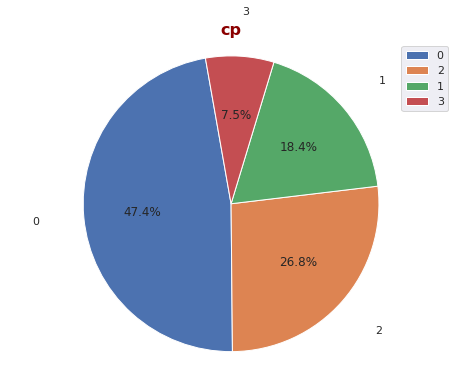

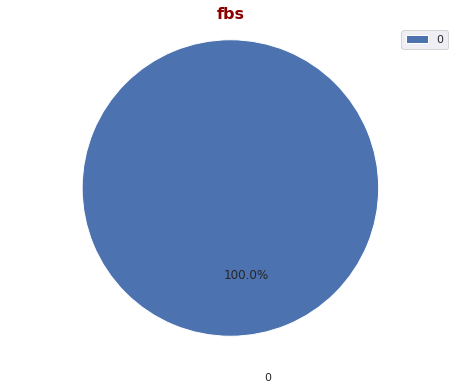

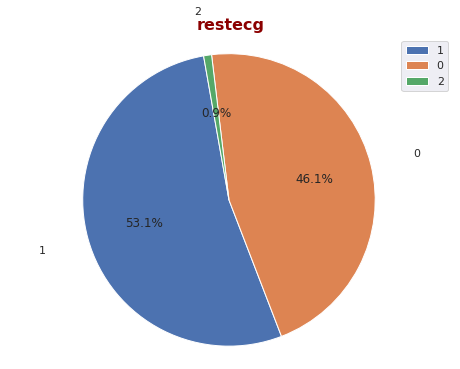

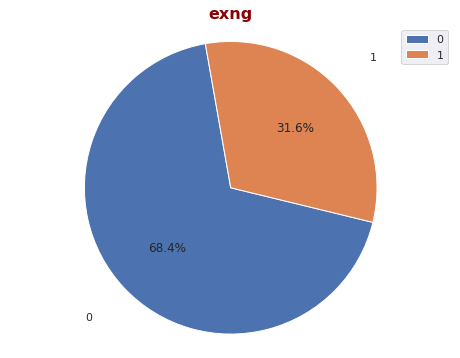

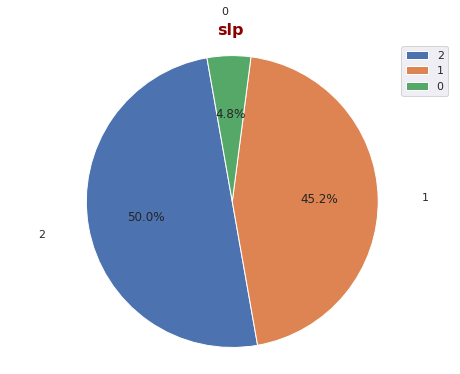

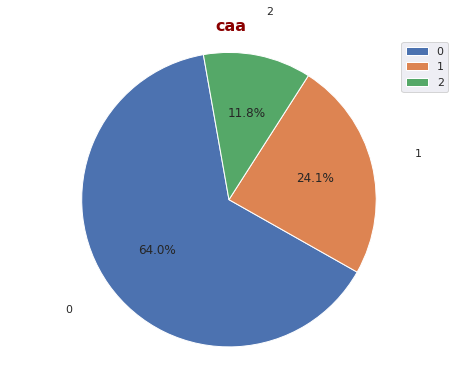

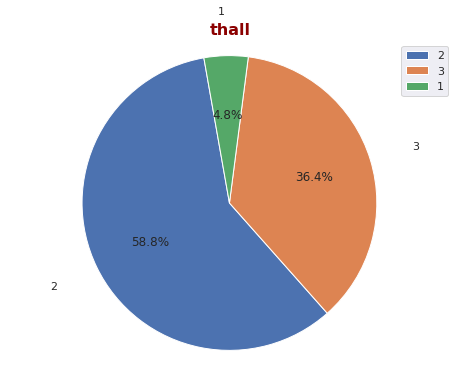

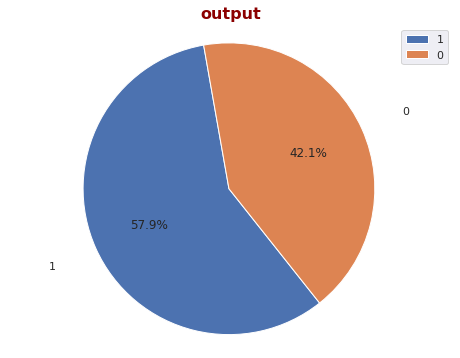

In [ ]:
title_font ={"family":"arial","color":"darkred","weight":"bold","size":16}
axis_font ={"family":"arial","color":"darkblue","weight":"bold","size":12}

for i in cat_var:
    fig, ax =plt.subplots(figsize =(8,6))
    index = list(data1[i].value_counts().index)
    value = list(data1[i].value_counts())
    ax.pie(value ,labels =index ,autopct ='%1.1f%%',startangle =100,labeldistance =1.3)
    ax.axis("equal")
    plt.title(i,fontdict =title_font)
    plt.legend()
    plt.show()


##HEAT MAP

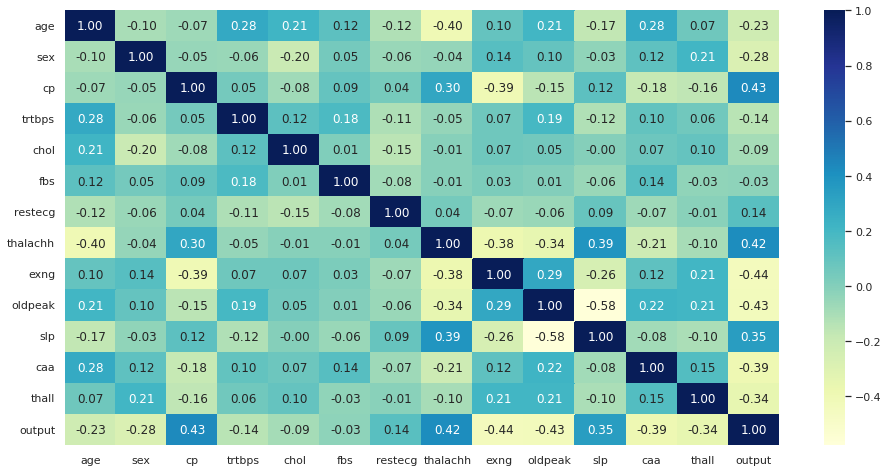

In [ ]:
plt.figure(figsize= (16, 8))
sns.heatmap(data.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f');

Our target variable seems to be correlated with cp (chest pain type), thalachh (max heart rate achieved), exng (exercise induced angina), oldpeak (previous peak), slp (slope), caa (number of major vessels), thall (Thalium stress test results)

##DISTRIBUTION PLOTS

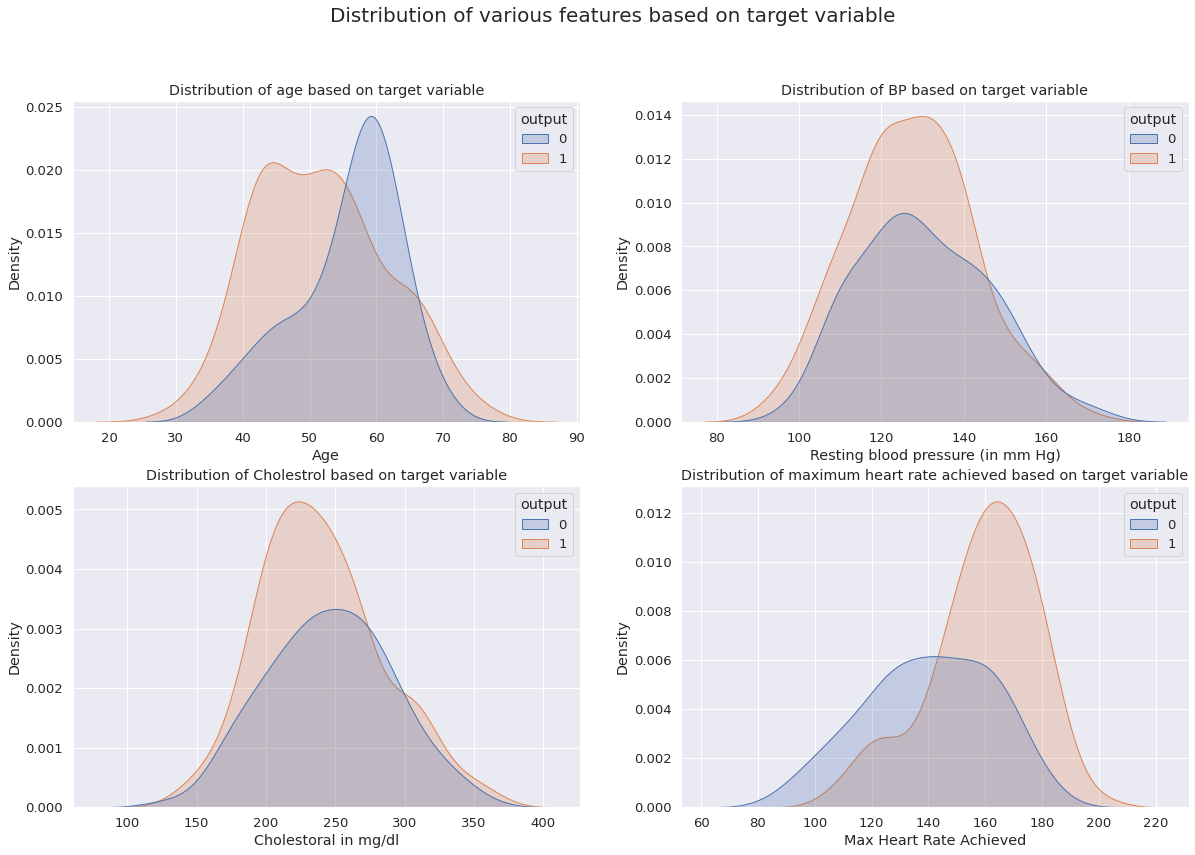

In [ ]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 2, figsize = (20, 13))

plt.suptitle('Distribution of various features based on target variable', fontsize = 20)

ax1 = sns.kdeplot(x ='age', data= data1, hue= 'output', shade= True, ax= ax[0, 0])
ax1.set(xlabel = 'Age', title= 'Distribution of age based on target variable')

ax2 = sns.kdeplot(x ='trtbps', data= data1, hue= 'output', shade= True, ax= ax[0, 1])
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)', title= 'Distribution of BP based on target variable')

ax3 = sns.kdeplot(x ='chol', data= data1, hue= 'output', shade= True, ax= ax[1, 0])
ax3.set(xlabel = 'Cholestoral in mg/dl', title= 'Distribution of Cholestrol based on target variable')

ax4 = sns.kdeplot(x ='thalachh', data= data1, hue= 'output', shade= True, ax= ax[1, 1])
ax4.set(xlabel = 'Max Heart Rate Achieved', title= 'Distribution of maximum heart rate achieved based on target variable')

plt.show()

We can clearly spot a pattern in the distribution of maximum heart rate achieved. Those who have reached a higher maximum heart rate are likely to have a heart attack

##COUNT PLOT

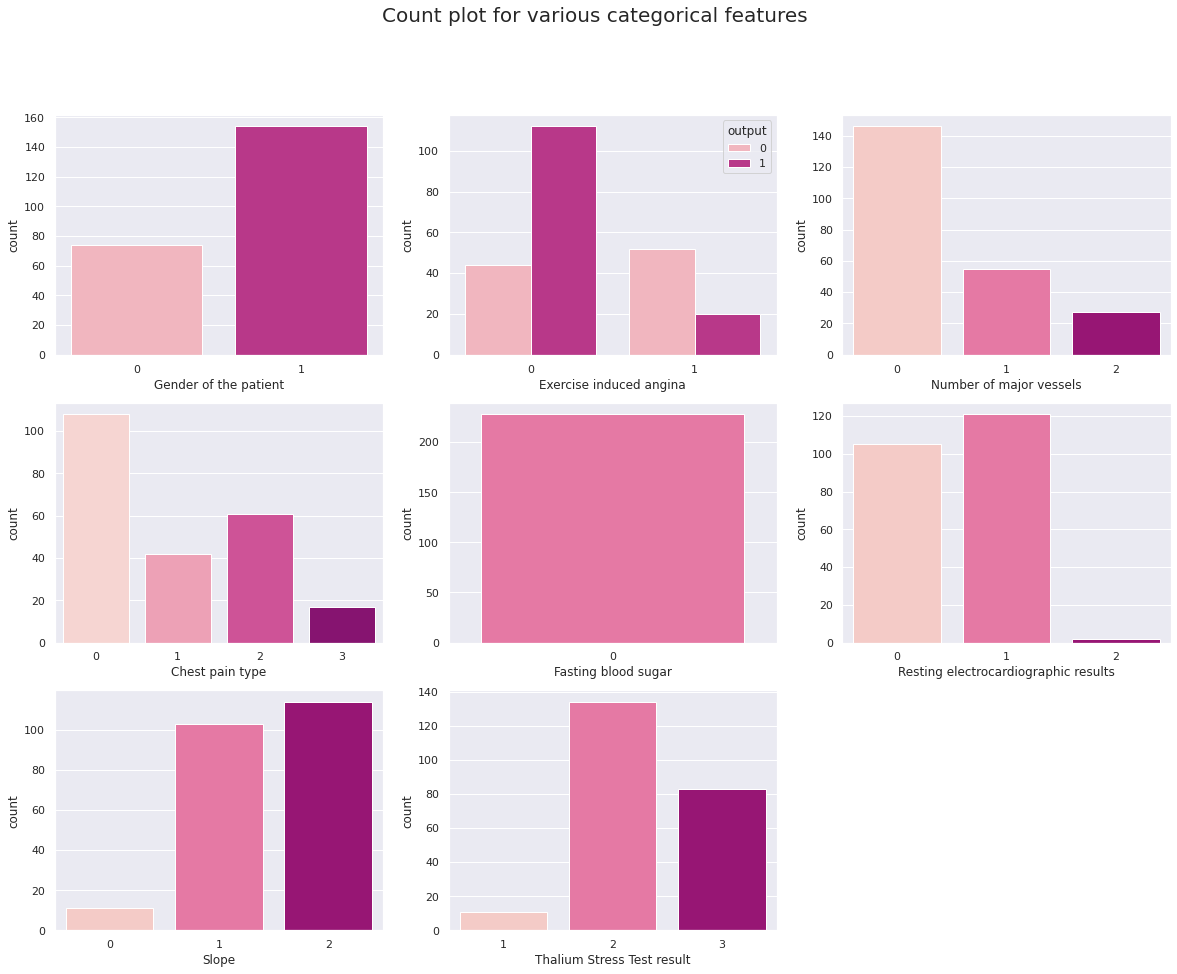

In [ ]:

sns.set_context('notebook', font_scale= 1)
fig, ax = plt.subplots(3, 3, figsize = (20, 15))
ax[2, 2].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 20)

ax1 = sns.countplot(x ='sex', data= data1, ax= ax[0, 0], palette= 'RdPu')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='exng', data= data1, hue= 'output', ax= ax[0, 1], palette= 'RdPu')
ax2.set(xlabel = 'Exercise induced angina')

ax3 = sns.countplot(x ='caa', data= data1, ax= ax[0, 2], palette= 'RdPu')
ax3.set(xlabel = 'Number of major vessels')

ax4 = sns.countplot(x ='cp', data= data1, ax= ax[1, 0], palette= 'RdPu')
ax4.set(xlabel = 'Chest pain type')

ax5 = sns.countplot(x ='fbs', data= data1, ax= ax[1, 1], palette= 'RdPu')
ax5.set(xlabel = 'Fasting blood sugar')

ax6 = sns.countplot(x ='restecg', data= data1, ax= ax[1, 2], palette= 'RdPu')
ax6.set(xlabel = 'Resting electrocardiographic results')

ax7 = sns.countplot(x ='slp', data= data1, ax= ax[2, 0], palette= 'RdPu')
ax7.set(xlabel = 'Slope')

ax8 = sns.countplot(x ='thall', data= data1, ax= ax[2, 1], palette= 'RdPu')
ax8.set(xlabel = 'Thalium Stress Test result')

plt.show()

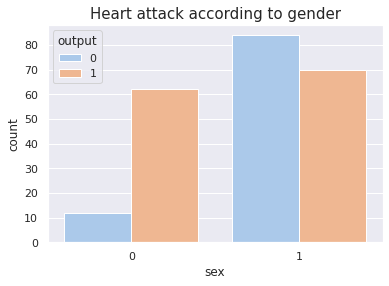

In [ ]:
sns.countplot(x = 'sex', data= data1, hue= 'output', palette= 'pastel')
plt.title('Heart attack according to gender', fontsize = 15);

We can see from this countplot that females are less likely to have a heart rate than men

#FEATURE SCALING

In [ ]:
#feature scaling
X = data1.drop('output', axis= 1)
y = data1.output

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.40 ,random_state= 42)

#LOGISTIC REGRESSION

In [ ]:
reg = LogisticRegression(penalty='l1', solver= 'liblinear')
reg.fit(X_train, y_train)

pred = reg.predict(X_test)

In [ ]:
print("True heart attack chances      :", y_test.values[:20])
print("Predicted heart attack chances :", pred[:20])

True heart attack chances      : [0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0]
Predicted heart attack chances : [1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0]


In [ ]:
print(f'Accuracy of our model is {round(accuracy_score(y_test, pred) * 100, 2)}%')

Accuracy of our model is 78.26%


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,pred)
print(cm)
accuracy_score(y_test,pred)

[[21 16]
 [ 4 51]]


0.782608695652174

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68        37
           1       0.76      0.93      0.84        55

    accuracy                           0.78        92
   macro avg       0.80      0.75      0.76        92
weighted avg       0.79      0.78      0.77        92



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20 ,random_state= 42)

In [ ]:
reg = LogisticRegression(penalty='l1', solver= 'liblinear')
reg.fit(X_train, y_train)

pred = reg.predict(X_test)

In [ ]:
print("True heart attack chances      :", y_test.values[:20])
print("Predicted heart attack chances :", pred[:20])

True heart attack chances      : [0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0]
Predicted heart attack chances : [1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0]


In [ ]:
print(f'Accuracy of our model is {round(accuracy_score(y_test, pred) * 100, 2)}%')

Accuracy of our model is 76.09%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30 ,random_state= 42)

In [ ]:
reg = LogisticRegression(penalty='l1', solver= 'liblinear')
reg.fit(X_train, y_train)

pred = reg.predict(X_test)

In [ ]:
print("True heart attack chances      :", y_test.values[:20])
print("Predicted heart attack chances :", pred[:20])

True heart attack chances      : [0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0]
Predicted heart attack chances : [1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0]


In [ ]:
print(f'Accuracy of our model is {round(accuracy_score(y_test, pred) * 100, 2)}%')

Accuracy of our model is 76.81%


#PRECISION/RECALL

In [ ]:
print(f'Precision: {round(precision_score(y_test, pred), 2)}')

Precision: 0.77


In [ ]:
print(f'Recall: {round(recall_score(y_test, pred), 2)}')

Recall: 0.88


In [ ]:
pred_prob = reg.predict_proba(X_test)
pred_prod_df = pd.DataFrame(data= pred_prob, columns= ['Low chances of heart attack', 'High chances of heart attack'])
pred_prod_df.head()


,Low chances of heart attack,High chances of heart attack
0,0.270752,0.729248
1,0.015606,0.984394
2,0.018893,0.981107
3,0.908515,0.091485
4,0.359344,0.640656


In [ ]:
#Storing the predicted probabilities of high chances of heart attack
pred_1 = reg.predict_proba(X_test)[:, 1]


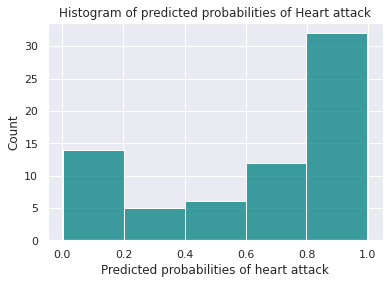

In [ ]:
sns.histplot(pred_1, bins= 5, color= 'teal')
plt.title('Histogram of predicted probabilities of Heart attack')
plt.xlabel('Predicted probabilities of heart attack')
plt.show()


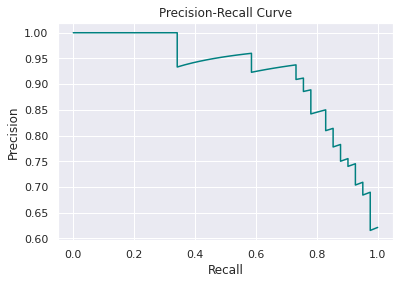

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, pred_1)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='teal')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()


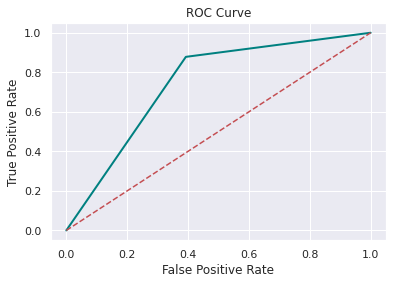

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


In [ ]:
roc_auc = roc_auc_score(y_test, pred_1)
print('ROC AUC Score: {:.2f}'.format(roc_auc))


ROC AUC Score: 0.88


In [ ]:
data1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#**NEURAL NETWORK**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25 ,random_state= 42)

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(14, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(12, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid'),
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs= 200)

Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 0.6935 - accuracy: 0.5088 - precision: 0.5541 - a=recall: 0.8200
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6340 - accuracy: 0.5848 - precision: 0.5848 - a=recall: 1.0000
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5493 - accuracy: 0.5848 - precision: 0.5848 - a=recall: 1.0000
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.6140 - precision: 0.6024 - a=recall: 1.0000
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4661 - accuracy: 0.8480 - precision: 0.8246 - a=recall: 0.9400
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4427 - accuracy: 0.8772 - precision: 0.8911 - a=recall: 0.9000
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4222 - accuracy: 0.8889 - precision: 0.9263 - a=recall: 0.8800
Epoch 8/200
6/6 [==============================]

2/2 [==============================] - 1s 6ms/step - loss: 2.0781 - accuracy: 0.8596 - precision: 0.8158 - a=recall: 0.9688


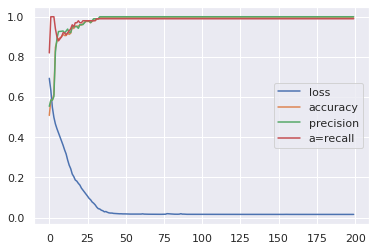

In [ ]:
model.evaluate(X_test,y_test)
pd.DataFrame(history.history).plot()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20 ,random_state= 42)

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(14, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid'),
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs= 1000)

Epoch 1/1000
6/6 [==============================] - 1s 3ms/step - loss: 0.6890 - accuracy: 0.5275 - precision: 0.7561 - a=recall: 0.2897
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5549 - precision: 0.7500 - a=recall: 0.3645
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.6154 - precision: 0.7846 - a=recall: 0.4766
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.6264 - precision: 0.7468 - a=recall: 0.5514
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.6374 - precision: 0.7303 - a=recall: 0.6075
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.6648 - precision: 0.7300 - a=recall: 0.6822
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.6923 - precision: 0.7383 - a=recall: 0.7383
Epoch 8/1000
6/6 [=======================

2/2 [==============================] - 1s 6ms/step - loss: 0.9213 - accuracy: 0.8261 - precision: 0.7742 - a=recall: 0.9600


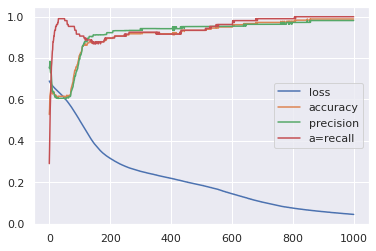

In [ ]:
model.evaluate(X_test,y_test)
pd.DataFrame(history.history).plot()

#**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.40 ,random_state= 42)

In [ ]:
clf= DecisionTreeClassifier(max_depth=5,random_state=42)  
clf.fit(X_train, y_train)  

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred= clf.predict(X_test)  

In [ ]:
print(met.accuracy_score(y_pred,y_test))

0.75


In [ ]:
from sklearn.metrics import confusion_matrix  


In [ ]:
cm= confusion_matrix(y_pred, y_test)  

In [ ]:
cm

array([[21,  7],
       [16, 48]])

#**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.40 ,random_state= 42)

In [ ]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.7934782608695652

In [ ]:
y_pred= rf.predict(X_test) 

In [ ]:
print(met.accuracy_score(y_pred,y_test)*100,"%")

79.34782608695652 %


In [ ]:
from sklearn.metrics import confusion_matrix  


In [ ]:
cm= confusion_matrix(y_pred, y_test)

In [ ]:
cm

array([[24,  6],
       [13, 49]])

#**BAGGING**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
import sklearn.metrics as met

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20 ,random_state= 42)

In [ ]:
clf= BaggingClassifier(n_estimators = 50,
                       max_samples = 0.8,
                       random_state =42)
l=clf.fit(X_train, y_train)

In [ ]:
print(met.accuracy_score(y_test,l.predict(X_test)))

0.8260869565217391


#**BOOSTING**

##**ADABOOST**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20 ,random_state= 42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=200,learning_rate=0.1,
                              random_state=42)
clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42)

In [ ]:
y_pred=clf.predict(X_test)


In [ ]:
print(met.accuracy_score(y_test,y_pred)*100,"%")

76.08695652173914 %


##**GRADIENTBOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.40 ,random_state= 42)

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100,learning_rate=0.2,max_depth=5,
                        random_state=42)
gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, random_state=42)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
print(met.accuracy_score(y_test,y_pred)*100,"%")

83.69565217391305 %


##**XTREMEGRADIENTBOOSTING**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20 ,random_state= 42)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf=XGBClassifier(n_estimators=200, learning_rate=0.2,max_depth=5,random_state=42)
clf.fit(X_train,y_train)

XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=200, random_state=42)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
print(met.accuracy_score(y_test,y_pred)*100,"%")

86.95652173913044 %


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.40 ,random_state= 42)

In [ ]:

classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[22 15]
 [ 3 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.59      0.71        37
           1       0.78      0.95      0.85        55

    accuracy                           0.80        92
   macro avg       0.83      0.77      0.78        92
weighted avg       0.82      0.80      0.80        92

Accuracy: 0.8043478260869565


#SVM

In [ ]:
from sklearn.svm import SVC   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30 ,random_state= 42)

In [ ]:
  
classifier = SVC(kernel='linear', random_state=42)  
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
print(met.accuracy_score(y_test,y_pred)*100,"%")

79.71014492753623 %


In [ ]:
from sklearn.metrics import confusion_matrix  


In [ ]:

cm= confusion_matrix(y_test, y_pred)  

In [ ]:
cm

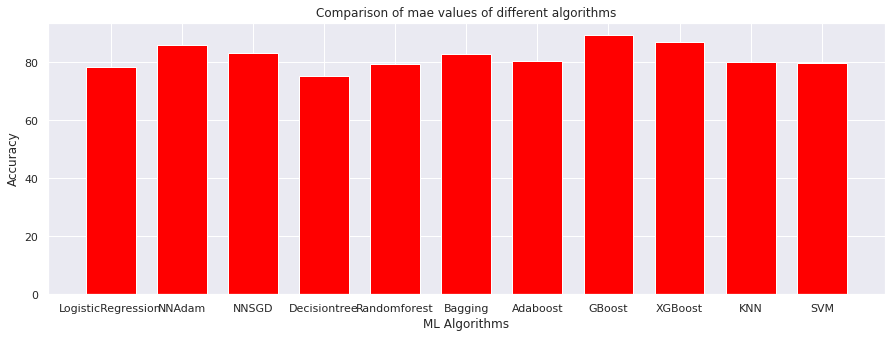

In [ ]:
data = {'LogisticRegression':78.26,  'NNAdam':86, 'NNSGD':83, 'Decisiontree':75, 'Randomforest':79.34,'Bagging':82.6, 'Adaboost':80.43, 'GBoost':89.13, 'XGBoost':86.95,'KNN':80,'SVM':79.71}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (15, 5))
plt.bar(courses, values, color = 'red',width=0.7)
plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of mae values of different algorithms")
plt.show()